In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
src = cv.imread('starry_night.jpg')

In [3]:
###  a method to detect edges in an image can be performed by locating pixel locations where the gradient is higher than 
### its neighbors (or to generalize, higher than a threshold).

In [4]:
### Sobel operator

In [5]:
src = cv.GaussianBlur(src, (3, 3), 0)

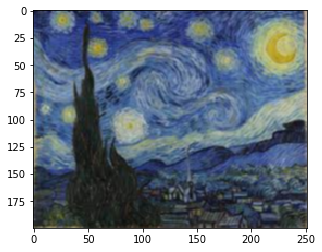

In [7]:
plt.imshow(cv.cvtColor(src,cv. COLOR_BGR2RGB))

In [8]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

In [9]:
scale = 1
delta = 0
ddepth = cv.CV_16S

In [10]:
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)


abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)


grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

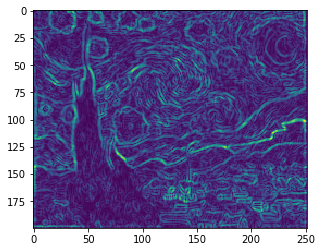

In [11]:
plt.imshow(grad)

In [13]:
kernel_size = 3
dst = cv.Laplacian(src, ddepth, ksize=kernel_size)
# [laplacian]
# [convert]
# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)

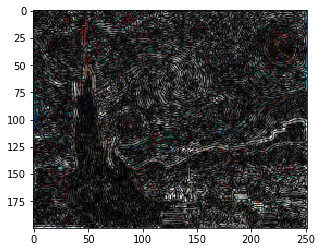

In [14]:
plt.imshow(abs_dst)

In [15]:
### Canny edge detector

In [16]:
## remove noise - using Gaussian Blur
## calculate gradient intensity and direction
## non maximal suppression
# Hysteresis: The final step. Canny does use two thresholds (upper and lower):

# If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
# If a pixel gradient value is below the lower threshold, then it is rejected.
# If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
# Canny recommended a upper:lower ratio between 2:1 and 3:1

In [17]:
max_lowThreshold = 100
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

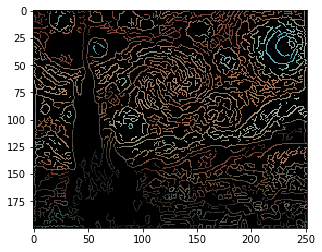

In [20]:
low_threshold = 20
img_blur = cv.blur(gray, (3,3))
detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = src * (mask[:,:,None].astype(src.dtype))
plt.imshow(dst)

In [3]:
## hough line transform - use to detect straight lines
## use edge detection as preprocessing step

In [4]:
src = cv.imread('monalisa.jpg', cv.IMREAD_GRAYSCALE)

In [5]:
dst = cv.Canny(src, 50, 200, None, 3)

In [6]:
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

In [7]:
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

In [8]:
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

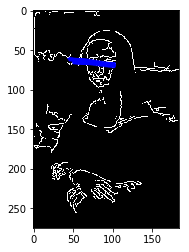

In [9]:
plt.imshow(cdstP)

In [11]:
## Hough circle transformation

In [20]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)


rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=0, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)

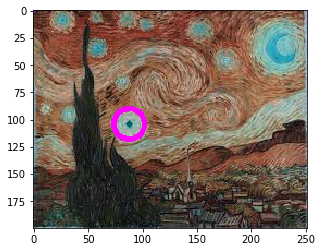

In [21]:
plt.imshow(src)